In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load the data and apply preprocessing

In [69]:
# Load the datasets
sch_stat_df = pd.read_excel('Datasets/scottish_schools_stats.xlsx')
sch_info_df = pd.read_excel('Datasets/scottish_schools_contact.xlsx', sheet_name='Open Schools')
dep_df = pd.read_excel('Datasets/postcode_deprivation.xlsx')

In [70]:
# Display the stats dataframe
sch_stat_df.head()

,Local Authority,SeedCode,School Name,School Type,Total pupils
0,Aberdeen City,1002929,Brimmond School,Primary,425
1,Aberdeen City,1004247,Countesswells School,Primary,110
2,Aberdeen City,5230420,Riverbank School,Primary,332
3,Aberdeen City,5230624,Westpark School,Primary,242
4,Aberdeen City,5230829,Heathryburn School,Primary,306


In [71]:
# Display the stats dataframe information
sch_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Local Authority  2461 non-null   object
 1   SeedCode         2461 non-null   int64 
 2   School Name      2461 non-null   object
 3   School Type      2461 non-null   object
 4   Total pupils     2461 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 96.3+ KB


In [72]:
# Display the info dataframe information
sch_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Seed Code                                2458 non-null   int64 
 1   LA Name                                  2458 non-null   object
 2   Centre Type                              2458 non-null   object
 3   School Name                              2458 non-null   object
 4   Address Line1                            2458 non-null   object
 5   Address Line2                            2457 non-null   object
 6   Address Line3                            2458 non-null   object
 7   Post Code                                2458 non-null   object
 8   Unique Property Reference Number (UPRN)  2458 non-null   int64 
 9   Email                                    2458 non-null   object
 10  Phone Number                             2458 non-null   obj

We only need to add Post Codes from contact dataframe to the stats dataframe

In [73]:
# Fix the Seed Code column name
sch_info = sch_info_df.rename(columns={'Seed Code' : 'SeedCode'})

In [74]:
# Merge two datasets on common feature: Seed Code
sch_df = sch_info.merge(sch_stat_df, on='SeedCode', how='left')

In [75]:
# Display the merged dataframe
sch_df.head()

,SeedCode,LA Name,Centre Type,School Name_x,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,...,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,Local Authority,School Name_y,School Type,Total pupils
0,1002929,Aberdeen City,Local Authority,Brimmond School,Netherhills Place,Bucksburn,ABERDEEN,AB21 9DF,9051145398,brimmondschool@aberdeencity.gov.uk,...,Yes,No,No,No,Yes,Non-denominational,Aberdeen City,Brimmond School,Primary,425.0
1,1004140,Aberdeen City,Local Authority,Orchard Brae School,Howes Road,0,ABERDEEN,AB16 7RH,9051129833,OrchardBraeSchool@aberdeencity.gov.uk,...,No,No,Yes,No,No,Non-denominational,Aberdeen City,Orchard Brae School,Special,129.0
2,1004166,Aberdeen City,Local Authority,Lochside Academy,Wellington Circle,Altens,ABERDEEN,AB12 3JG,9051148374,nehendry@aberdeencity.gov.uk,...,No,Yes,No,No,No,Non-denominational,Aberdeen City,Lochside Academy,Secondary,1138.0
3,1004247,Aberdeen City,Local Authority,Countesswells School,Airyhall School,Countesswells Road,ABERDEEN,AB15 8AD,9051018828,CountesswellsSchool@aberdeencity.gov.uk,...,Yes,No,No,No,No,Non-denominational,Aberdeen City,Countesswells School,Primary,110.0
4,5230420,Aberdeen City,Local Authority,Riverbank School,Dill Road,Tillydrone,ABERDEEN,AB24 2XL,9051054562,riverbank@aberdeencity.gov.uk,...,Yes,No,No,No,Yes,Non-denominational,Aberdeen City,Riverbank School,Primary,332.0


In [76]:
# Remove unnecessary columns
columns_to_remove = ['School Name_y', 'Centre Type', 'Address Line1',
       'Address Line2', 'Address Line3', 'Unique Property Reference Number (UPRN)', 'Email', 'Phone Number',
       'Website Address', 'Pre-school Department', 'Primary Department',
       'Secondary Department', 'Special Department', 'Gaelic Unit',
       'Integrated Special Unit', 'Denomination', 'Local Authority']


sch_df.drop(columns=columns_to_remove, inplace=True) # Drop the columns
sch_df = sch_df.rename(columns={'School Name_x' : 'School Name'}) # Fix the column name
sch_df = sch_df.rename(columns={'LA Name' : 'Local Authority'}) # Fix the column name

In [77]:
# create a function to return the deprivation value
def get_dep(pos):
    try:
        dep_value = dep_df[dep_df['Postcode'] == pos]['SIMD2020v2_Quintile'].values[0]
        return dep_value
    
    except:
        return None

In [78]:
# Add the deprivaion quintile value for each school
sch_df['Deprivation Quintile'] = list(map(get_dep, sch_df['Post Code']))

In [79]:
# Drop null values
sch_df = sch_df.dropna()

## Visualisation

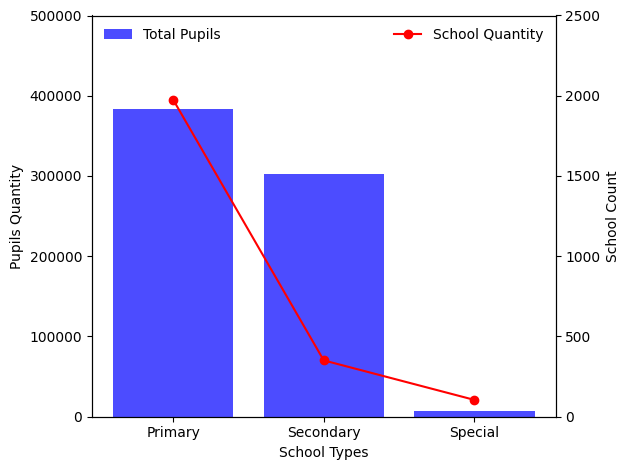

In [80]:
# Sample data for student count and school count for three different school types
school_types = list(sch_df.groupby('School Type').sum().index)
pupils_count = sch_df.groupby('School Type').sum()['Total pupils'].values
school_count = sch_df.groupby('School Type').count()['School Name'].values

# Create a figure and axis
fig, ax1 = plt.subplots()

# Create the bar chart for student count
ax1.bar(school_types, pupils_count, color='b', alpha=0.7, label='Total Pupils')
ax1.set_xlabel('School Types')
ax1.set_ylabel('Pupils Quantity')
ax1.set_ylim(0,500000)
ax1.tick_params(axis='y')

# Create a second y-axis on the right for school count
ax2 = ax1.twinx()
ax2.plot(school_types, school_count, color='r', marker='o', label='School Quantity')
ax2.set_ylabel('School Count')
ax2.set_ylim(0,2500)
ax2.tick_params(axis='y')

# Add legends
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

# Show the plot
plt.tight_layout()

cwd = os.getcwd()
figures_folder = os.path.join(cwd, 'figures')  # No leading forward slash before 'figures'

os.makedirs(figures_folder, exist_ok=True)

# Save the plot as a JPG image in the 'figures' folder
plt.savefig(os.path.join(figures_folder, 'Total Number of Pupils and Schools per School Type.jpg'), format='jpg', dpi=300)


plt.show()

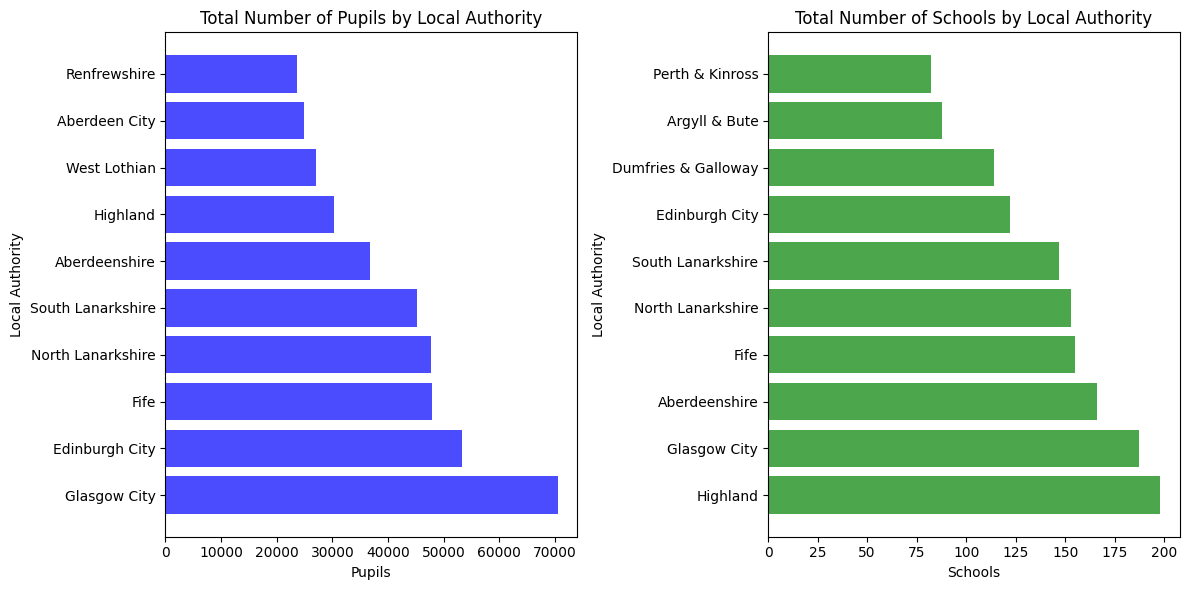

In [81]:
# Sample data (replace with your actual data)
data = {
    'LocalAuthority': list(sch_df.groupby('Local Authority').count().index),
    'Schools': sch_df.groupby('Local Authority').count()['School Name'],
    'Pupils': sch_df.groupby('Local Authority').sum()['Total pupils'],
}

df = pd.DataFrame(data)
df_1 = df.sort_values(by=['Pupils'], ascending=False)[:10]
df_2 = df.sort_values(by=['Schools'], ascending=False)[:10]

# Set a larger figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a subplot with 1 row and 2 columns for side-by-side bar charts
plt.subplot(1, 2, 1)

# Create horizontal bar chart for the total number of pupils
plt.barh(df_1['LocalAuthority'], df_1['Pupils'], color='b', alpha=0.7)
plt.xlabel('Pupils')
plt.ylabel('Local Authority')
plt.title('Total Number of Pupils by Local Authority')

# Create a subplot for the second bar chart
plt.subplot(1, 2, 2)

# Create horizontal bar chart for the total number of schools
plt.barh(df_2['LocalAuthority'], df_2['Schools'], color='g', alpha=0.7)
plt.xlabel('Schools')
plt.ylabel('Local Authority')
plt.title('Total Number of Schools by Local Authority')

# Adjust the spacing between subplots
plt.tight_layout()

# Define the folder path and create it if it doesn't exist
cwd = os.getcwd()
figures_folder = os.path.join(cwd, 'figures')  # No leading forward slash before 'figures'

os.makedirs(figures_folder, exist_ok=True)

# Save the plot as a JPG image in the 'figures' folder
plt.savefig(os.path.join(figures_folder, 'Total Number of Pupils,Schools per Local Authority.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()
